In [83]:
import pandas as pd
import numpy as np
import pynapple as nap
import matplotlib.pyplot as plt

data = pd.read_csv("/Users/tazakkaibrahimadie/Documents/Mine/UALBERTA/Research with Dr. Munz/Caiman Analysis Pipeline/good!/Second full trial 2.0.csv", 
                   header=None,
                   na_values=[' '])

data = data.fillna(0)
data_float = np.array(data)

# Extract time column and data columns
time = data.iloc[:, 0].values            # time: first column
data1 = data.iloc[:, 1].values           # data: first ROI

# rolling average
df1_rolling = pd.DataFrame(data1).rolling(window=3).mean()

# compute the fast fourier transform (FFT)

dt = 0.5217505568                                           # no. of frames / duration of recording (frame rate)

n = len(time)
fhat1 = np.fft.fft(df1_rolling.to_numpy(), n)                   # compute the FFT
PSD1 = fhat1 * np.conj(fhat1) / n                              # power spectrum (power per frequency)
freq = (1/(dt * n)) * np.arange(n)                          # create x-axis of frequencies
L = np.arange(1, np.floor(n/2), dtype = 'int')              # only plot the first half (real signals are symmetric)

In [85]:
import pandas as pd
import numpy as np
import pynapple as nap
import matplotlib.pyplot as plt

data = pd.read_csv("/Users/tazakkaibrahimadie/Documents/Mine/UALBERTA/Research with Dr. Munz/Caiman Analysis Pipeline/good!/Second full trial 2.0.csv", 
                   header=None,
                   na_values=[' '])

data = data.fillna(0)
data_float = np.array(data)

# Extract time column and data columns
time = data.iloc[:, 0].values            # time: first column
data2 = data.iloc[:, 2].values           # data: 2nd ROI

# rolling average
df2_rolling = pd.DataFrame(data2).rolling(window=3).mean()

# compute the fast fourier transform (FFT)

dt = 0.5217505568                                           # no. of frames / duration of recording (frame rate)

n = len(time)
fhat2 = np.fft.fft(df2_rolling.to_numpy(), n)                   # compute the FFT
PSD2 = fhat2 * np.conj(fhat2) / n                              # power spectrum (power per frequency)
freq = (1/(dt * n)) * np.arange(n)                          # create x-axis of frequencies
L = np.arange(1, np.floor(n/2), dtype = 'int')              # only plot the first half (real signals are symmetric)

In [86]:
import pandas as pd
import numpy as np
import pynapple as nap
import matplotlib.pyplot as plt

data = pd.read_csv("/Users/tazakkaibrahimadie/Documents/Mine/UALBERTA/Research with Dr. Munz/Caiman Analysis Pipeline/good!/Second full trial 2.0.csv", 
                   header=None,
                   na_values=[' '])

data = data.fillna(0)
data_float = np.array(data)

# Extract time column and data columns
time = data.iloc[:, 0].values            # time: first column
data3 = data.iloc[:, 3].values          # data: 3rd ROI

# rolling average
df3_rolling = pd.DataFrame(data3).rolling(window=3).mean()

# compute the fast fourier transform (FFT)

dt = 0.5217505568                                           # no. of frames / duration of recording (frame rate)

n = len(time)
fhat3 = np.fft.fft(df3_rolling.to_numpy(), n)                   # compute the FFT
PSD3 = fhat3 * np.conj(fhat3) / n                              # power spectrum (power per frequency)
freq = (1/(dt * n)) * np.arange(n)                          # create x-axis of frequencies
L = np.arange(1, np.floor(n/2), dtype = 'int')              # only plot the first half (real signals are symmetric)

## Calcium traces after: **(1) Rolling Average** and **(2) Fourier Transform**

# This shows the **Power Spectrum Density (PSD)**

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


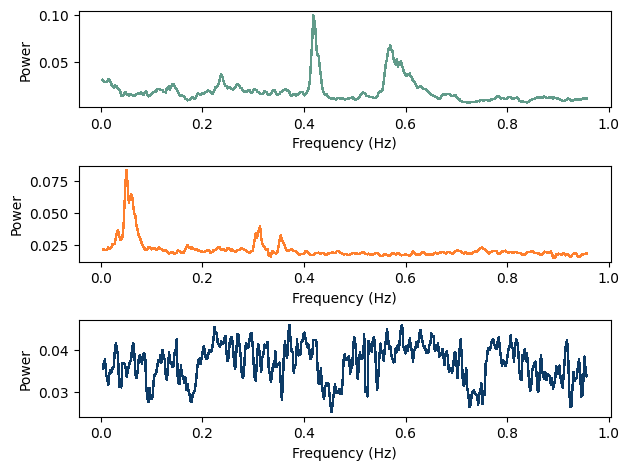

In [87]:
fig, axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(freq[L], PSD1[L], color="#619b8a", linewidth = 1)
plt.ylabel("Power")
plt.xlabel("Frequency (Hz)")

plt.sca(axs[1])
plt.plot(freq[L], PSD2[L], color="#fe7f2d", linewidth = 1)
plt.ylabel("Power")
plt.xlabel("Frequency (Hz)")

plt.sca(axs[2])
plt.plot(freq[L], PSD3[L], color="#0d3b66", linewidth = 1)
plt.ylabel("Power")
plt.xlabel("Frequency (Hz)")

plt.tight_layout()
plt.show()


In [88]:
# use the PSD to filter out noise

indices1 = PSD1 > 0.05                            # find all freqs with large power
PSDclean = PSD1 * indices1                        # find out all others
fhat1 = indices1 * fhat1                           # zero out small fourier coeff. in Y
fhat1_scaled = 0.1 * fhat1                        # reduce the amplitude
f_filt1 = np.fft.ifft(fhat1_scaled)                # inverse FFT for filtered time signal

indices2 = PSD2 > 0.05                            # find all freqs with large power
PSDclean = PSD2 * indices2                      # find out all others
fhat2 = indices2 * fhat2                           # zero out small fourier coeff. in Y
fhat2_scaled = 0.1 * fhat2                        # reduce the amplitude
f_filt2 = np.fft.ifft(fhat2_scaled)                # inverse FFT for filtered time signal

indices3 = PSD3 > 0.04                            # find all freqs with large power
PSDclean = PSD3 * indices3                      # find out all others
fhat3 = indices3 * fhat3                          # zero out small fourier coeff. in Y
fhat3_scaled = 0.1 * fhat3                        # reduce the amplitude
f_filt3 = np.fft.ifft(fhat3_scaled)                # inverse FFT for filtered time signal

/var/folders/4d/6037z1q56j9gtxsnjxt7jlxc0000gn/T/ipykernel_15056/766956698.py:3: RuntimeWarning: invalid value encountered in greater
  indices1 = PSD1 > 0.05                            # find all freqs with large power
/var/folders/4d/6037z1q56j9gtxsnjxt7jlxc0000gn/T/ipykernel_15056/766956698.py:9: RuntimeWarning: invalid value encountered in greater
  indices2 = PSD2 > 0.05                            # find all freqs with large power
/var/folders/4d/6037z1q56j9gtxsnjxt7jlxc0000gn/T/ipykernel_15056/766956698.py:15: RuntimeWarning: invalid value encountered in greater
  indices3 = PSD3 > 0.04                            # find all freqs with large power


## **Clean Traces** after unwanted frequencies taken out

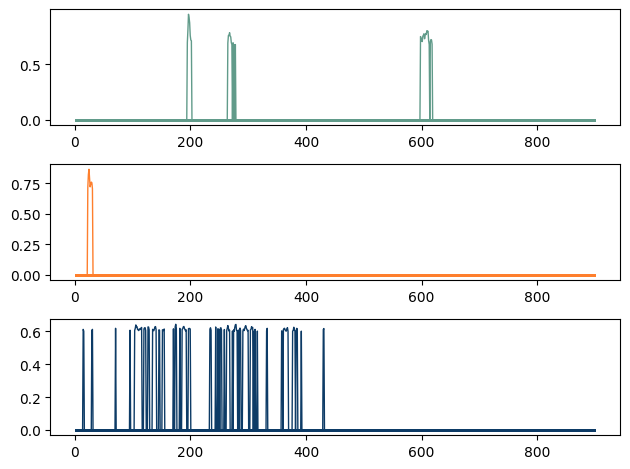

In [89]:
#plot the clean traces
fig, axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(time, f_filt1, color="#619b8a", linewidth = 1)

plt.sca(axs[1])
plt.plot(time, f_filt2, color="#fe7f2d", linewidth = 1)

plt.sca(axs[2])
plt.plot(time, f_filt3, color="#0d3b66", linewidth = 1)

plt.tight_layout()
plt.show()